# Programming of quantum computers: Introduction to Qiskit

## Quantum Computing and its Applications,
### 2025 Spring

#### Balázs Solymos, Dr. László Bacsárdi, Dr. Sándor Imre
solymosb@hit.bme.hu

## General info
The notebook used during this session will be available in the Teams group of the course.

During the practice session we use the [Qiskit](https://qiskit.org/) python library with the [Jupyter Notebook](https://jupyter.org/) development environment.
For those wanting to follow along using their own machine (either during the practice session or after the session at home) an insrallation of Python, Jupyter notebook and Qiskit is needed. The last two can be added to an existing Python installation utilizing `pip` by the following command.

```
pip install notebook
pip install qiskit[visualization]
pip install qiskit-ibm-runtime
pip install qiskit-aer
```

Then, Jupyter can be started by the command "`jupyter notebook`".

## 1. Simple quantum circuits with Qiskit

Egy áramkört a "QuantumCircuit" osztály példányosításával tudunk létrehozni.
A circuit object can be created using the "QuantumCircuit" class.

In [1]:
from qiskit import QuantumCircuit #import the required library
qc = QuantumCircuit(3)            # create a QuantumCircuit object

The number of qubits can be given to the constructor as a parameter. The individual qubits are indexed starting from index 0.

## Adding quantum gates

If we want to add quantum gates, we can do so by utilizing the corresponding functions of the ciecuit object.

In [2]:
qc.h(0)

We can also add controlled gates. The first parameter is then the index of the control qubit, with the second parameter being the index of the target qubit.

In [3]:
qc.cx(0,1)
qc.cx(0,2)

## Visualizing circuits

We can visualize a circuit using the "draw()" function.

The parameter of the function is a string, specifying the output format.

e.g.: "text", "latex" or "mpl".

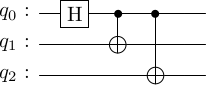

In [4]:

qc.draw("latex")

## Circuits in Qiskit

How does Qiskit handle circuits?

Lets look at the simple X gate!

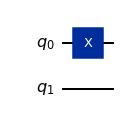

In [5]:
qc_x = QuantumCircuit(2,0)
qc_x.x(0)
qc_x.draw("mpl")

### Stored data structure

In [6]:
qc_x.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]

The "X" gate:

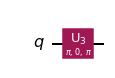

In [7]:
qc_x.data[0].operation.definition.draw('mpl')

Important: `CircuitInstruction` and `QuantumCircuit` are different, even though both describes modifying quantum bits.

### Combining circuits.
Two seperately created circutis can be combined with the "compose" function

In [8]:
qc_a = QuantumCircuit(3) #First circuit
qc_a.x(1) 
qc_b = QuantumCircuit(2, name="qc_b") #Second circuit
qc_b.x(0)
qc_b.z(1)
combined = qc_a.compose(qc_b, qubits=[1, 2]) #Adding them together

 The first parameter of the function is the circuit to add to our current circuit object. The second parameter are the list of qubits it will act on.

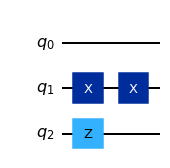

In [9]:
combined.draw("mpl")

### Combining circuits 2.

An alternative solution is to use the ".to_instruction()" function to convert the circuit into an instruction, after which it can be used as a simple gate.


In [10]:
qc_a = QuantumCircuit(3)
qc_a.x(1)
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.x(0)
qc_b.z(1)
inst = qc_b.to_instruction()

The "append" function can then be used to append our instruction to a circuit.
The list of qubits to act on need to be given here too as a parameter.

In [11]:
qc_a.append(inst, [1, 2])

### Combining circuits 2.

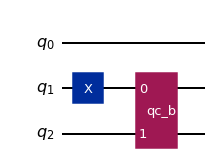

In [12]:
qc_a.draw("mpl")

Using the "decompose" function we can see how an instruction is realized.

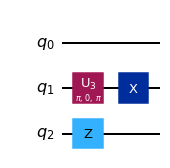

In [13]:
qc_a.decompose().draw("mpl")

### Creating controlled gates
If the circuit we use to create an instruction is unitary, then we can use it as any other unitary gate. For example, this means that we can also create controlled versions from it.

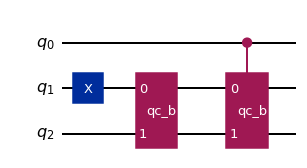

In [14]:
gate = qc_b.to_gate().control()
# Since it is a controlled gate we need to give 3 qubits.
qc_a.append(gate, [0, 1, 2])
qc_a.draw("mpl")

### Creating controlled gates
Decomposition:

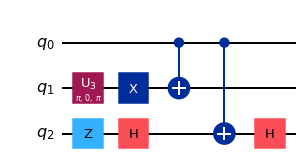

In [15]:
qc_a.decompose().draw("mpl")

## Initializing ciruits with a state vector
Initialization (now using registers):

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(2,'q') #creating the register containing the qubits
c = ClassicalRegister(2,'c') #creating the register containing the classical bits
qc = QuantumCircuit(q,c) #create a quantumcircuit from the registers

Define the state vector:

In [17]:
from qiskit.quantum_info import Statevector
state1 = Statevector([0.6,0.8])

State initialization:

In [18]:
qc.initialize(state1,qubits=q[0], normalize=True)

The created circuit:

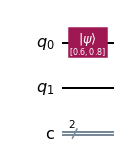

In [19]:
qc.draw("mpl")

Getting the state vector from a circuit:

In [20]:
state_qc = Statevector(qc)
print(state_qc)

Statevector([0.6+0.j, 0.8+0.j, 0. +0.j, 0. +0.j],
            dims=(2, 2))


The state can be also printed in the familiar LaTeX form:

In [21]:
from qiskit.visualization import array_to_latex
array_to_latex(state_qc) # print with LaTex

<IPython.core.display.Latex object>

## Running circuits

To run the circuits we mainly use simulators. (Using quantum computers available in the cloud is also a possibility, though be prepared for waiting queues.)

In most cases, the expected final output of the circuit simulation is some classical information.
For this, we need an additional operation: measurement. This step realizes the specified measurement operator on a quantum register and writes the measurement result into a classical register.

Let's create a quantum circuit that has both quantum and classical registers:

In [22]:
qc = QuantumCircuit(2,2) # second parameter is the number of classical bits
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

Let's use the statevector simulator!

In [23]:
from qiskit_aer import Aer
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
result = job.result() # Blokkoló hívás!
outputstate = result.get_statevector(qc)
array_to_latex(outputstate)

<IPython.core.display.Latex object>

 The "measure" function is used to define measurements in the circuit. Its first parameter is the list of qubits to measure and the second is the list of classical bits to store the results. Lets use the Aer simulator to run a ciruit with measurements!

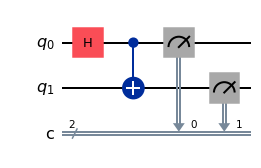

In [24]:
qc.measure(range(2), range(2))
qc.draw("mpl")

In [25]:
backend = Aer.get_backend("aer_simulator")
result = backend.run(qc, shots=1000).result()
# We can acces the measurement results with the result.get_counts function.
counts = result.get_counts()
print(counts)

{'00': 485, '11': 515}


We can plot the measurement results on a histogram.

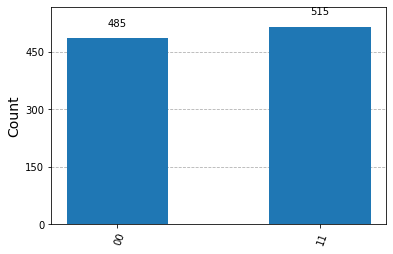

In [26]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Getting state vectors from the simulation
Prepare the circuit:

In [27]:
q = QuantumRegister(2,'q') #Create register for qbits (q[index] to index individual bits)
c = ClassicalRegister(2,'c') #Create register for classical bits (c[index] to index individual bits)
qc = QuantumCircuit(q,c) #create circuit from registers
qc.h(q[0]) #H gate
qc.cx(q[0],q[1]) #CNOT gate
qc.save_statevector(label = 'before_meas', pershot = True)
qc.measure(q[0],c[0])
qc.save_statevector(label = 'after_meas', pershot = True)
qc.measure(q[1],c[1])
qc.draw()

┌───┐      before_meas ┌─┐ after_meas    
q_0: ┤ H ├──■────────░──────┤M├─────░─────────
     └───┘┌─┴─┐      ░      └╥┘     ░      ┌─┐
q_1: ─────┤ X ├──────░───────╫──────░──────┤M├
          └───┘      ░       ║      ░      └╥┘
c: 2/════════════════════════╩══════════════╩═
                             0              1

Simulation:

In [28]:
from qiskit import transpile
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=4,memory=True) # 4-szer ismételjük meg a kísérletet, hogy statisztikát kapjunk és elvégezzük a mérést
#get measurement results
result_sim = job_sim.result()
print(result_sim.data(0)['before_meas'])
print(result_sim.data(0)['after_meas'])

[Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))]
[Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2)), Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2)), Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2)), Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))]


## Preparing arbitrary qubits
Create a circuit that can prepare an arbitrary quantum state!

Goal: Create a|0> + b|1> state in a quantum register.

In [29]:
import numpy as np
a = 0.6
b = 0.8
qc = QuantumCircuit(1)
print(Statevector(qc))
qc.draw() 







Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


q:

## Superdense coding
Remember from lecture:
![Szupersűrű tömörítés áramköre](szupersuru.png)

Create the circuit!

In [30]:
input_bits = [1,1]
qc = QuantumCircuit(2,2)
#some code here

#simulation
backend = Aer.get_backend("aer_simulator")
result = backend.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)
qc.draw()

QiskitError: 'No counts for experiment "0"'